## Import Libraries and Load Data

- Begin by importing necessary libraries (`pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`).
- Load your dataset (`DATA_SET_1.xlsx`) into a DataFrame (`data`).
- Display the first few rows of the DataFrame to inspect its structure.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_excel('DATA_SET_1.xlsx')


In [7]:
print(data)

       BILLING_MONTH CUST_CL_CD  AREA  GAS_CHARGES  METER_RENT       GST  \
0             201901        COM  7503      5972.51         100   1214.51   
1             201901        COM  6513     59708.07         100  14952.01   
2             201901        COM  6515      5880.10         100   1196.02   
3             201901        COM  7709     18400.78         200   3720.17   
4             201901        COM  6511     30732.01         200   7330.13   
...              ...        ...   ...          ...         ...       ...   
92762         201905        COM  7502    104286.60         100  26096.65   
92763         201905        COM  7502     49721.18         200  12480.30   
92764         201905        COM  7503      5880.10         100   1196.02   
92765         201905        COM  7503      5880.10         100   1196.02   
92766         201905        COM  7503      5880.10         100   1196.02   

         TOTAL_SCM  TOTAL_MMBTU  LESS_PROV_BILLS    ARREARS  ...  SWTAXGSD  \
0       1

In [8]:
print(data.head())

   BILLING_MONTH CUST_CL_CD  AREA  GAS_CHARGES  METER_RENT       GST  \
0         201901        COM  7503      5972.51         100   1214.51   
1         201901        COM  6513     59708.07         100  14952.01   
2         201901        COM  6515      5880.10         100   1196.02   
3         201901        COM  7709     18400.78         200   3720.17   
4         201901        COM  6511     30732.01         200   7330.13   

     TOTAL_SCM  TOTAL_MMBTU  LESS_PROV_BILLS   ARREARS  ...  SWTAXGSD  \
0   181.579657     6.094386              0.0   8767.83  ...         0   
1  1716.885272    60.926575              0.0      0.00  ...         0   
2   151.769151     5.385146              0.0     -0.69  ...         0   
3   559.400684    18.776275              0.0     -3.09  ...         0   
4   883.792533    31.359153              0.0  20118.51  ...         0   

       SIC_CD  GIDCESS  GST_EXTRA  GST_FURTHER  GST_VAL_ADD  GST_STANDARD  \
0  60010051.0      0.0       0.00       182.18     

## Group by 'BILLING_MONTH' and Sum Gas Charges and Meter Rent

- Group the data by `BILLING_MONTH`.
- Sum the `GAS_CHARGES` and `METER_RENT` columns.
- Reset the index to make `BILLING_MONTH` a regular column.
- Display the resulting DataFrame showing monthly totals.

---

In [9]:
# Step 1: Group by 'BILLING_MONTH' and sum the 'GAS_CHARGES' and 'METER_RENT' columns
monthly_totals = data.groupby('BILLING_MONTH')[['GAS_CHARGES', 'METER_RENT']].sum()

# Step 2: Optionally, reset index to make 'BILLING_MONTH' a regular column
monthly_totals = monthly_totals.reset_index()

# Step 3: Display the resulting DataFrame with the sums
print(monthly_totals) 


   BILLING_MONTH   GAS_CHARGES  METER_RENT
0         201901  1.532401e+10    64702827
1         201902  1.494215e+10    64833827
2         201903  1.669355e+10    65009848
3         201904  1.788189e+10    65197009
4         201905  1.831728e+10    65289129


## Group by Customer Class - 'CUST_CL_CD' and Summarize Gas Charges and Meter Rent
- Use the `groupby()` function on the `CUST_CL_CD` column of the dataset (`data`).
- Compute the sum of `GAS_CHARGES` and `METER_RENT` for each unique customer class.
- Print the grouped DataFrame showing the total gas charges and meter rent for each customer class.

In [10]:
# Group by 'CUST_CL_CD' and sum the 'GAS_CHARGES' and 'METER_RENT' columns
monthly_totalsx = data.groupby('CUST_CL_CD')[['GAS_CHARGES','METER_RENT']].sum()

# Reset index to make 'CUST_CL_CD' a regular column
monthly_totalsx = monthly_totalsx.reset_index()

# Print the resulting DataFrame with the sums
print(monthly_totalsx)


  CUST_CL_CD   GAS_CHARGES  METER_RENT
0        COM  3.870640e+09    10149778
1   COM-SPRT  2.247709e+08      874653
2        DOM  1.063908e+10   294290605
3   DOM-BULK  7.908764e+08     2928086
4   DOM-GOVT  9.602959e+08     2726791
5        IND  6.739315e+10    13729072
6   INT-CUST -7.331107e+08      145445
7    PREPAID -1.198685e+05       26457
8   RTD-EXEC  1.832580e+06       12657
9   SUBSTAFF  1.146489e+07      149096


## Prompt the User to Enter Billing Month and Class (Optional) and fetch its data!

- Plot a bar chart showing the sum of `GAS_CHARGES` for each `BILLING_MONTH`.
- Customize the plot with appropriate labels, title, and color scheme.

---

In [15]:
# Prompt the user to enter the billing month
billing_month = int(input("Enter the billing month: "))

# Prompt the user to enter the customer class (optional)
cust_cl_cd=input("Enter the customer class (optional): ")

# Filter the DataFrame based on the billing month and customer class (if provided)
if cust_cl_cd:
    filtered_data = data[(data['BILLING_MONTH'] == billing_month) & (data['CUST_CL_CD'] == cust_cl_cd)]
else:
    filtered_data = data[data['BILLING_MONTH'] == billing_month]

# Display the specified columns ('GAS_CHARGES', 'METER_RENT', 'AREA', 'GST') for the filtered data
if not filtered_data.empty:
    columns_to_display = ['CUST_CL_CD','GAS_CHARGES', 'METER_RENT', 'AREA', 'GST']
    result = filtered_data[columns_to_display]
    print(result)
else:
    print("No data found for the specified criteria.")

      CUST_CL_CD  GAS_CHARGES  METER_RENT  AREA        GST
0            COM      5972.51         100  7503    1214.51
1            COM     59708.07         100  6513   14952.01
2            COM      5880.10         100  6515    1196.02
3            COM     18400.78         200  7709    3720.17
4            COM     30732.01         200  6511    7330.13
...          ...          ...         ...   ...        ...
13440        COM     21732.97         200  1921    5184.24
13441        COM     61030.18         200  1921   14647.83
13442        COM    665597.00        1900  1921  164633.18
13443        COM    207361.64         500  2300   49568.50
13444        COM      5880.10         100  2300    1016.62

[7699 rows x 5 columns]


## Visualize Monthly Gas Charges Using Bar Plot, Pie Chart & Line Plot
- Plot a bar chart showing the sum of `GAS_CHARGES` for each `BILLING_MONTH`
- Calculate the total `GAS_CHARGES` for each `BILLING_MONTH`
- Customize the plot with labels, title, and x-axis formatting for better readability.

---

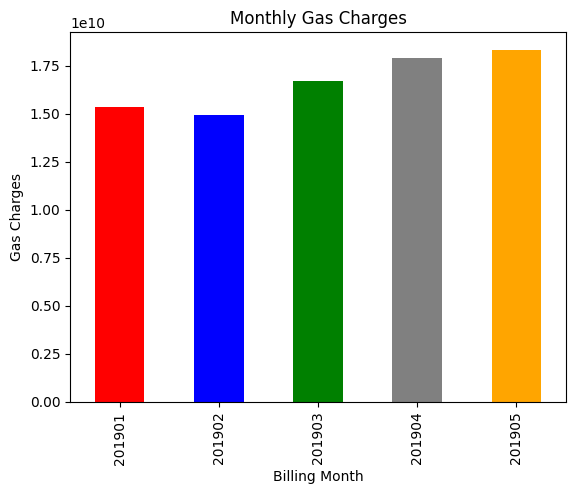

In [12]:
colors=['red','blue','green','gray','orange','purple','brown','pink','yellow','cyan']
data.groupby('BILLING_MONTH')['GAS_CHARGES'].sum().plot(kind='bar', color=colors)
plt.title('Monthly Gas Charges')
plt.xlabel('Billing Month')
plt.ylabel('Gas Charges')
plt.show()


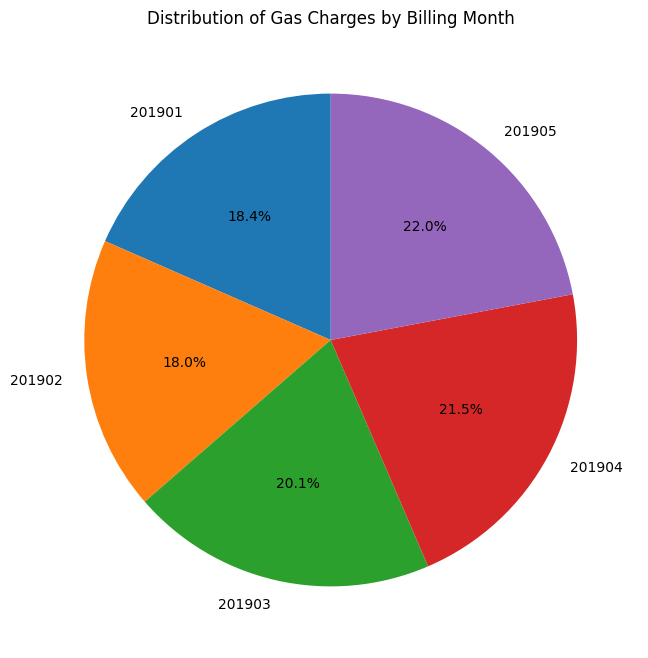

In [13]:
# Calculate the total gas charges for each billing month
totals_by_month = data.groupby('BILLING_MONTH')['GAS_CHARGES'].sum()

# Plot a pie chart between the billing months and gas charges
plt.figure(figsize=(8, 8))  # Set the figure size (optional)
plt.pie(totals_by_month, labels=totals_by_month.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gas Charges by Billing Month')  # Set the title of the pie chart (optional)
plt.show()  # Show the plot


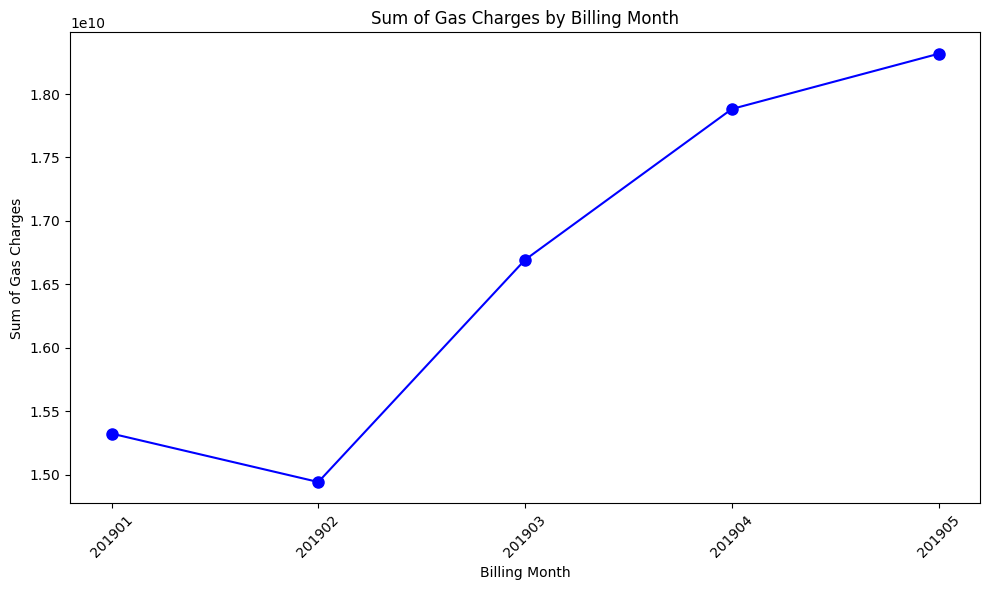

In [17]:
from matplotlib.ticker import ScalarFormatter

# Calculate the sum of gas charges for each billing month
sum_gas_charges = data.groupby('BILLING_MONTH')['GAS_CHARGES'].sum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size (optional)
ax.plot(sum_gas_charges.index, sum_gas_charges.values, marker='o', markersize=8, color='blue')  # Create the line plot
ax.set_xlabel('Billing Month')  # Set the label for the x-axis
ax.set_ylabel('Sum of Gas Charges')  # Set the label for the y-axis
ax.set_title('Sum of Gas Charges by Billing Month')  # Set the title of the plot

# Set the x-axis ticks to be the billing months as integers
ax.set_xticks(sum_gas_charges.index)
ax.set_xticklabels(sum_gas_charges.index, rotation=45)  # Rotate the x-axis labels for better readability

# Use ScalarFormatter to ensure x-axis ticks are displayed as whole numbers
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot



## Using Linear Regression to Predict Future Gas Charges

- Import `LinearRegression` from `sklearn.linear_model`.
- Prepare training data by selecting data from January 2019 to May 2019.
- Fit a linear regression model to predict `GAS_CHARGES` based on `BILLING_MONTH`.
- Predict gas charges for June 2019 (`201906`) and print the result.

In [18]:
# Using Linear Regression to Predict Future Gas Charges
from sklearn.linear_model import LinearRegression

train_data=data[(data['BILLING_MONTH']>=201901) & (data['BILLING_MONTH']<=201905)]

sum_gas_charges=train_data.groupby('BILLING_MONTH')['GAS_CHARGES'].sum()
x_train=np.array(sum_gas_charges.index).reshape(-1,1)
y_train=np.array(sum_gas_charges.values)

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
x_test=np.array([[201906]])
y_pred=model.predict(x_test)

print(f"Predicted charges for 201906: {y_pred[0]}")

Predicted charges for 201906: 19309655644.8125


## Plotting Actual and Predicted Gas Charges Using Linear Regression

- Create a line plot showing actual `GAS_CHARGES` over time.
- Overlay a scatter plot with predicted gas charges for June 2019 using a red asterisk (`*`).
- Customize the plot with appropriate labels, title, legend, and grid.

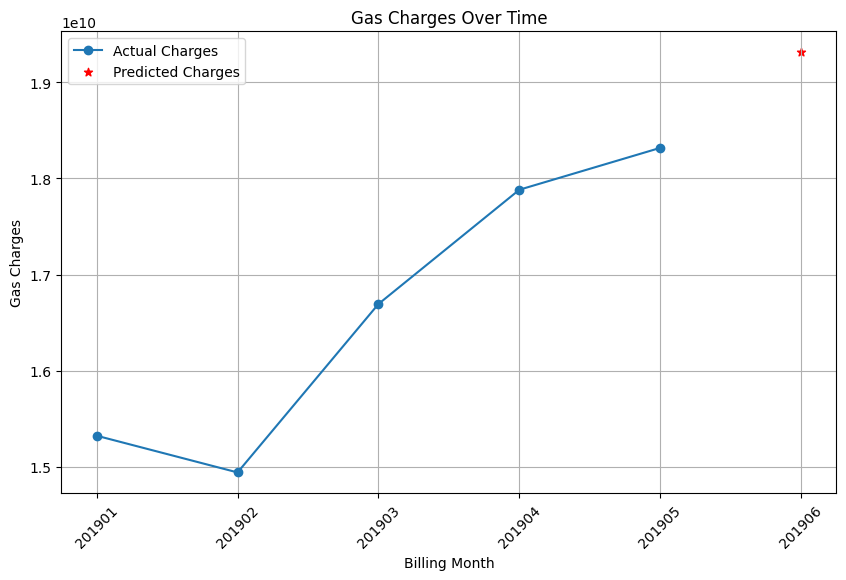

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sum_gas_charges.index, sum_gas_charges.values, marker='o', label='Actual Charges')
plt.scatter(201906, y_pred, color='red', marker='*', label='Predicted Charges')

# Add 201906 to the x-axis ticks
xticks = list(sum_gas_charges.index) + [201906]
plt.xticks(xticks, rotation=45)
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.title('Gas Charges Over Time')
plt.xlabel('Billing Month')
plt.ylabel('Gas Charges')
plt.legend()
plt.grid(True)
plt.show()

## Calculate MAE and Relative Error for Predicted Gas Charges

- Define the actual gas charge for June 2019 (`y_actual`).
- Compute the Mean Absolute Error (MAE) between `y_actual` and `y_pred`.
- Calculate the Relative Error as the absolute difference divided by `y_actual`.
- Display the predicted gas charges, MAE, and relative error.

In [23]:
# Calculating the MAE for month of June
y_actual=19489997904.85

mae=np.mean(np.abs(y_actual-y_pred))
print(f"Predicted gas charges for month of June 2019: {y_pred[0]}")
print(f"Mean Absolute Error (MAE): {mae}")

Predicted gas charges for month of June 2019: 19309655644.8125
Mean Absolute Error (MAE): 180342260.03749847


In [24]:
# Given values
actual_value = y_actual
predicted_value = y_pred[0]

# Calculate the relative error
relative_error = abs(actual_value - predicted_value) / actual_value

# Display the result
print(f"Relative Error: {relative_error}")


Relative Error: 0.00925306718440545


## Using Gradient Boosting Regressor to Predict Future Gas Charges

- Import `GradientBoostingRegressor` from `sklearn.ensemble`.
- Fit a gradient boosting regressor model to predict `GAS_CHARGES` based on `BILLING_MONTH`.
- Predict gas charges for June 2019 (`201906`) and print the result.

---

Predicted charges for 201906: 18317231849.102596


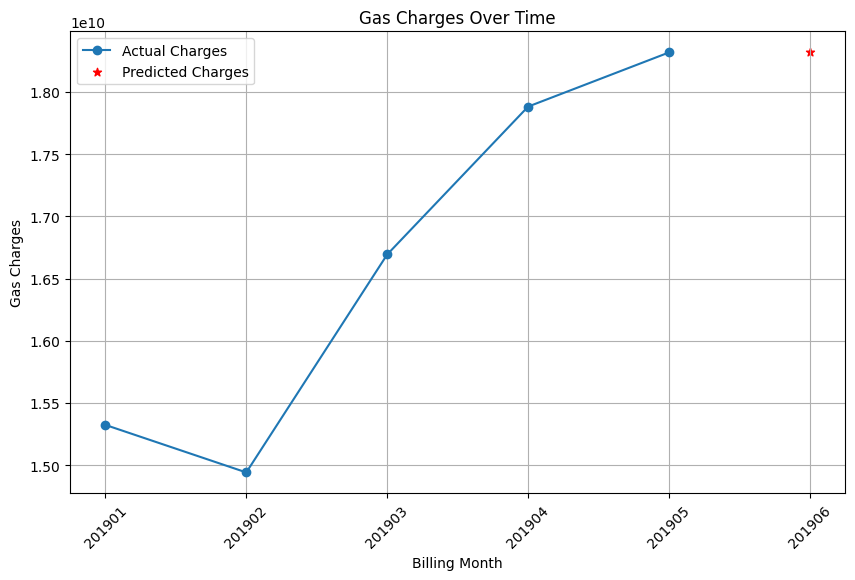

In [25]:
# Using Gradient Boosting Regressor to Predict Future Gas Charges

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
model = GradientBoostingRegressor()

# Fit the model
model.fit(x_train, y_train)

# Predict gas charges for June 2019 (201906)
x_test = np.array([[201906]])
y_pred = model.predict(x_test)

print(f"Predicted charges for 201906: {y_pred[0]}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sum_gas_charges.index, sum_gas_charges.values, marker='o', label='Actual Charges')
plt.scatter(201906, y_pred, color='red', marker='*', label='Predicted Charges')

# Add 201906 to the x-axis ticks
xticks = list(sum_gas_charges.index) + [201906]
plt.xticks(xticks, rotation=45)
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.title('Gas Charges Over Time')
plt.xlabel('Billing Month')
plt.ylabel('Gas Charges')
plt.legend()
plt.grid(True)
plt.show()


## Plotting Actual and Predicted Gas Charges Using Gradient Boosting Regressor

- Create a line plot showing actual `GAS_CHARGES` over time.
- Overlay a scatter plot with predicted gas charges for June 2019 using a red asterisk (`*`).
- Customize the plot with appropriate labels, title, legend, and grid.

---

In [1]:
# Calculate Mean Absolute Error (MAE) for month of June
y_actual = 19489997904.85
mae = mean_absolute_error([y_actual], [y_pred])

print(f"Predicted gas charges for month of June 2019: {y_pred[0]}")
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Relative Error
relative_error = abs(y_actual - y_pred[0]) / y_actual
print(f"Relative Error: {relative_error}")

NameError: name 'mean_absolute_error' is not defined